<a href="https://colab.research.google.com/github/pranjal-ogg/Benford-Law-Analysis/blob/main/Naankhatai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BENFORD'S LAW AND EDA ON stars_dataset**

#TEAM DETAILS

PriyanshuVerma   : priyanshu.verma@adypu.edu.in
Rounak Kumar Saw : Rounak.saw@adypu.edu.in  
Pranjal Tripathi : Pranjal.Tripathi@adypu.edu.in  
Aditya Mishra    : aditya.mishra@adypu.edu.in

#**1.Importing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import chisquare
df = pd.read_csv('stars_dataset.csv')

#2.Basic Information:

In [ ]:

#INFO
print(df.info())
#HEAD-TOP 5
display(df.head())
#DESCRIBE- STATISTICS SUMMARY
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      150 non-null    int64  
 1   Star Name               0 non-null      float64
 2   Equatorial Coordinates  0 non-null      float64
 3   Galactic Longitude      150 non-null    float64
 4   Galactic Latitude       150 non-null    float64
 5   Spectral Type           0 non-null      float64
 6   Visual Magnitude        141 non-null    float64
 7   Absolute Magnitude      141 non-null    float64
 8   Parallax                150 non-null    float64
 9   Error                   150 non-null    float64
 10  Distance (ly)           150 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 13.0 KB
None


,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
0,1,NaN,NaN,227.2,-8.9,NaN,-1.46,1.43,379.21,1.58,9
1,2,NaN,NaN,261.2,-25.3,NaN,-0.73,-5.64,10.43,0.53,310
2,3,NaN,NaN,315.8,-0.7,NaN,-0.29,4.06,742.12,1.40,4
3,7,NaN,NaN,209.3,-25.1,NaN,NaN,NaN,4.22,0.81,770
4,9,NaN,NaN,290.7,-58.8,NaN,0.45,-2.77,22.68,0.57,144


,No,Star Name,Equatorial Coordinates,Galactic Longitude,Galactic Latitude,Spectral Type,Visual Magnitude,Absolute Magnitude,Parallax,Error,Distance (ly)
count,150.000000,0.0,0.0,150.000000,150.000000,0.0,141.000000,141.000000,150.000000,150.000000,150.000000
mean,147.713333,NaN,NaN,204.814667,-21.908667,NaN,2.685106,-1.468440,31.825267,0.819467,389.640000
std,87.905558,NaN,NaN,103.441957,18.939483,NaN,0.830270,2.505327,74.363499,0.793510,458.451995
min,1.000000,NaN,NaN,0.900000,-80.700000,NaN,-1.460000,-7.510000,1.020000,0.380000,4.000000
25%,65.250000,NaN,NaN,127.200000,-31.775000,NaN,2.380000,-3.290000,6.677500,0.570000,117.250000
50%,150.500000,NaN,NaN,219.150000,-15.350000,NaN,2.900000,-1.360000,14.465000,0.750000,222.500000
75%,223.750000,NaN,NaN,288.625000,-7.000000,NaN,3.270000,0.290000,27.895000,0.850000,490.000000
max,296.000000,NaN,NaN,359.200000,-0.400000,NaN,3.530000,5.680000,742.120000,9.900000,3000.000000


#3.Benford’s Law Analysis (First Digit Analysis)

CHECKING FOR BENFORD'S LAW
Benford's Law (also known as the First-Digit Law) is a statistical phenomenon where the leading digits of many sets of numerical data are not uniformly distributed. Instead, smaller digits (like 1) tend to appear more frequently as the first digit than larger digits (like 9).

For example:

The digit 1 appears as the first digit about 30.1% of the time.
The digit 2 appears as the first digit about 17.6% of the time.
The digit 9 appears as the first digit only 4.6% of the time.

Benford's Law applies to many types of datasets, like:

Financial data
Population numbers
Physical constants
Data from social media, scientific measurements, etc.

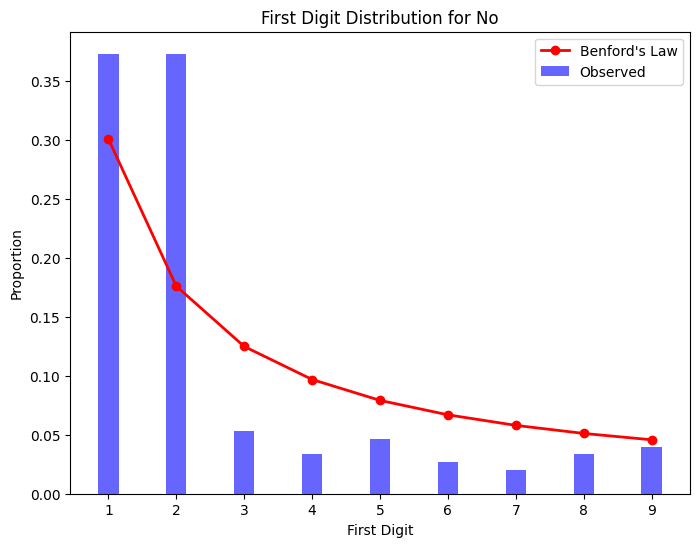

Skipping column 'Star Name' because it has no valid data.
Skipping column 'Equatorial Coordinates' because it has no valid data.


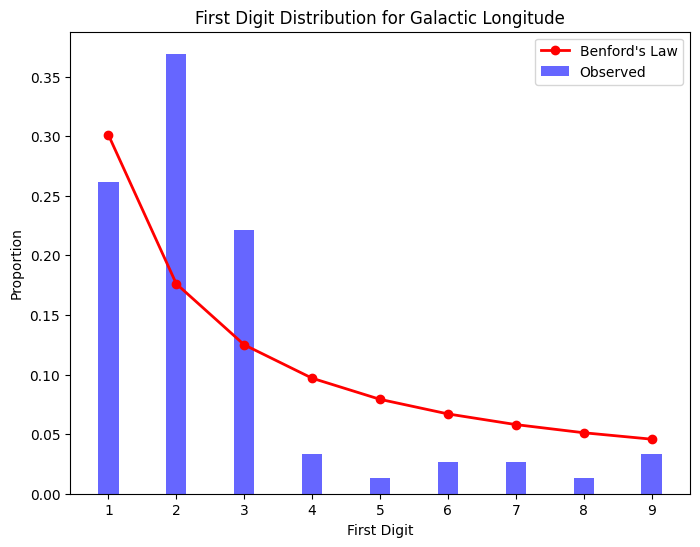

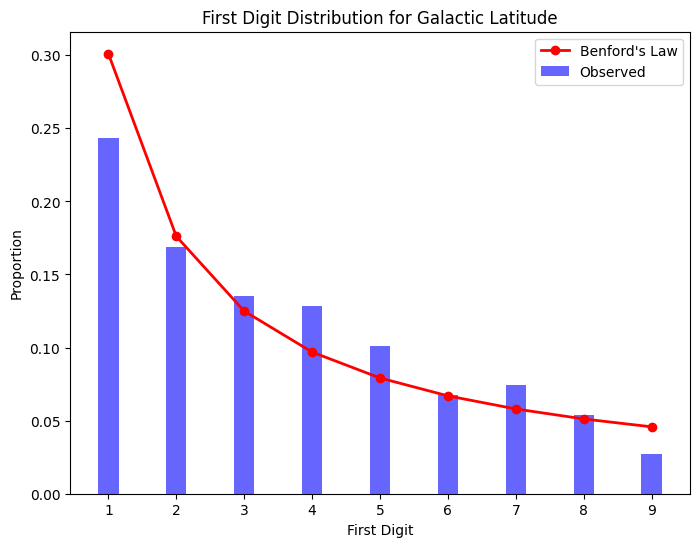

Skipping column 'Spectral Type' because it has no valid data.


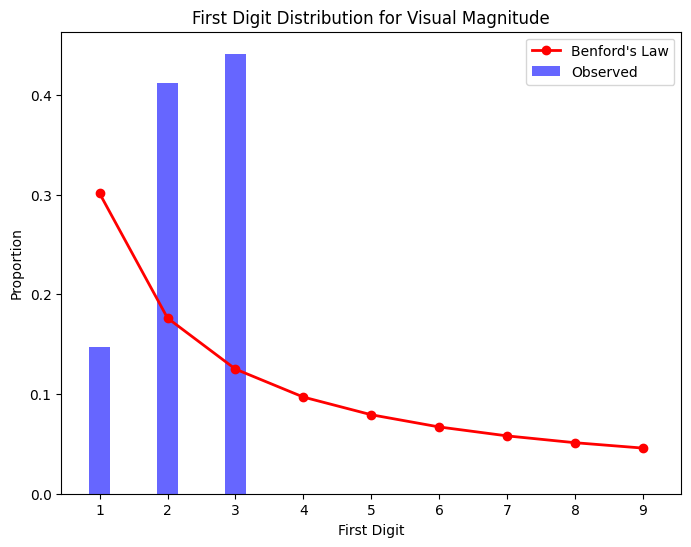

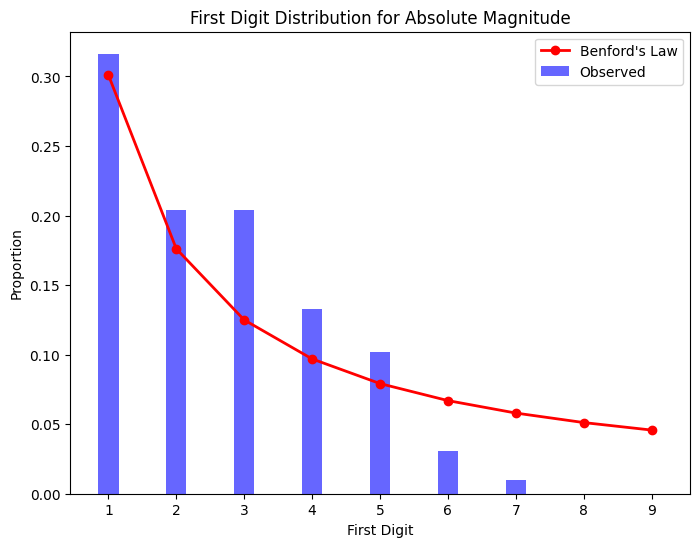

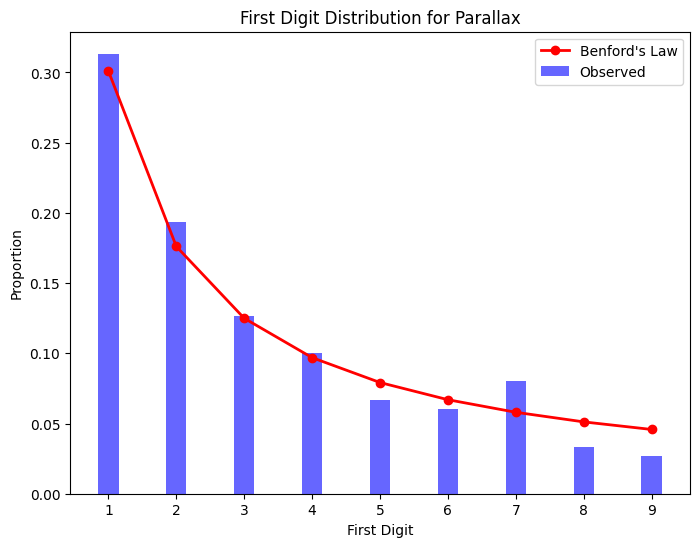

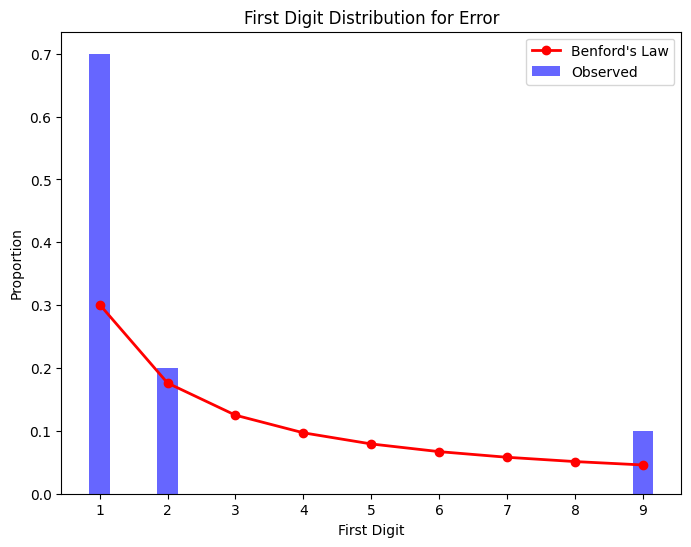

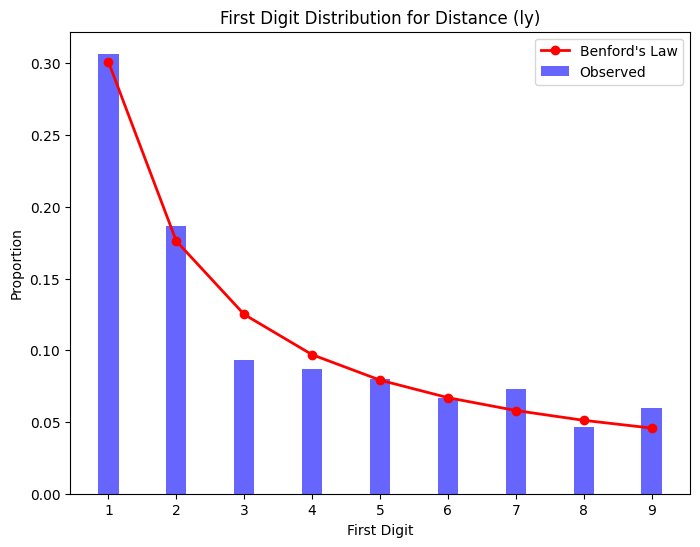

In [ ]:
# Function to extract the first digit of a number
def first_digit(number):
    if pd.isna(number):  # Check if the number is NaN
        return None
    return int(str(abs(number))[0])

# Convert all columns to numeric, coercing invalid values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Function to get the first digit distribution for a numerical column
def get_first_digit_distribution(column):
    first_digits = [first_digit(x) for x in column.dropna()]
    count = Counter(first_digits)
    return count

# Benford's Law expected distribution for the first digit
benford_distribution = [np.log10(1 + 1/d) for d in range(1, 10)]

# Loop through each numerical column, apply the first_digit function, and plot the distributions
for column in df.select_dtypes(include=[np.number]).columns:
    # Get first digit distribution for the current column
    first_digit_count = get_first_digit_distribution(df[column])

    # Prepare the data for plotting
    digits = list(range(1, 10))
    observed_frequencies = [first_digit_count.get(digit, 0) for digit in digits]
    total_count = sum(observed_frequencies)

    # Skip if no valid data in the column
    if total_count == 0:
        print(f"Skipping column '{column}' because it has no valid data.")
        continue

    # Normalize observed frequencies to be proportions
    observed_proportions = [freq / total_count for freq in observed_frequencies]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.bar(digits, observed_proportions, alpha=0.6, label="Observed", color='b', width=0.3, align='center')

    # Plot Benford's Law distribution
    plt.plot(digits, benford_distribution, 'r-', label="Benford's Law", linewidth=2,marker='o')

    # Titles and labels
    plt.title(f"First Digit Distribution for {column}")
    plt.xlabel('First Digit')
    plt.ylabel('Proportion')
    plt.xticks(digits)
    plt.legend()

    plt.show()

*Each graph will now show:*

*Bars (Observed): The observed first digit distribution (blue bars).*
*Red Line with Dots: The expected first digit distribution according to Benford’s Law (red line with dots).*
*This will make it easier to visually compare the observed distribution with Benford's expected distribution at each point.*

#4.Distribution of Key Variables

**We'll create histograms and density plots to analyze the distribution of key numerical columns like Visual Magnitude, Distance (ly), and Apparent Magnitude.**

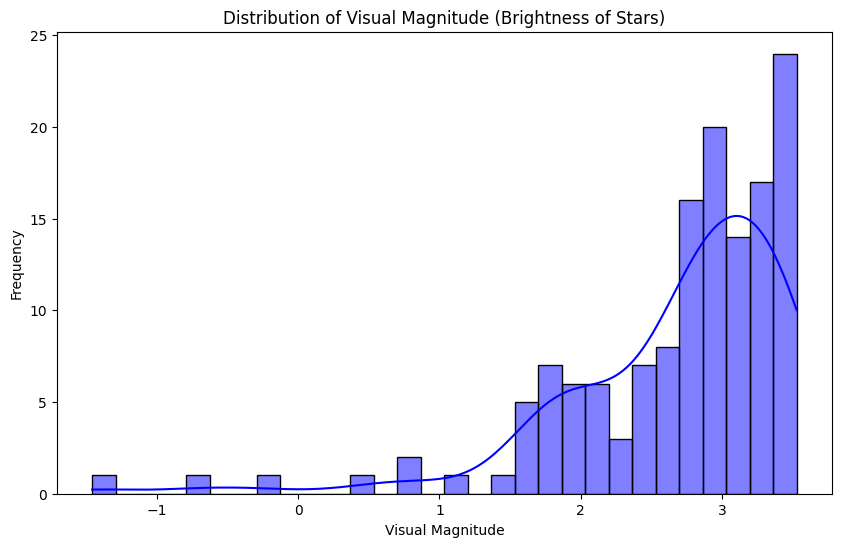

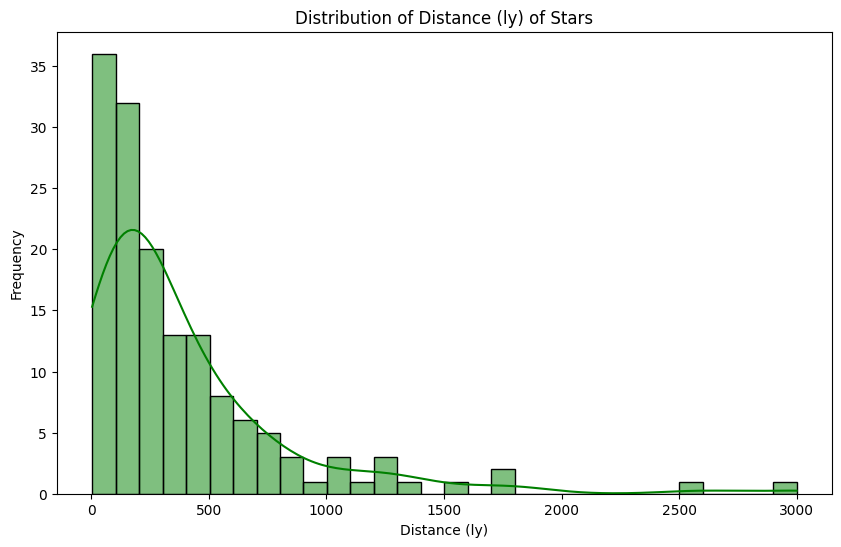

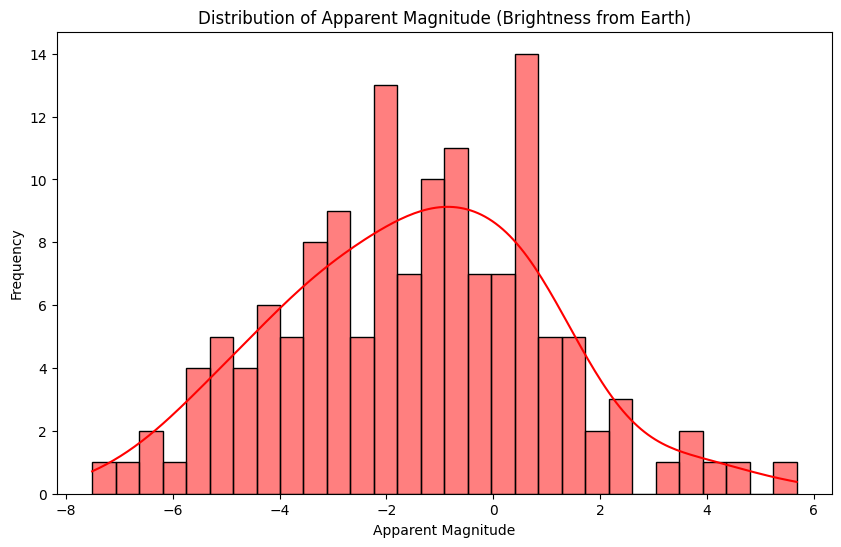

In [ ]:
# Plot distribution of 'Visual Magnitude'
plt.figure(figsize=(10, 6))
sns.histplot(df['Visual Magnitude'].dropna(), kde=True, color='blue', bins=30)
plt.title('Distribution of Visual Magnitude (Brightness of Stars)')
plt.xlabel('Visual Magnitude')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of 'Distance (ly)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance (ly)'].dropna(), kde=True, color='green', bins=30)
plt.title('Distribution of Distance (ly) of Stars')
plt.xlabel('Distance (ly)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of 'Apparent Magnitude'
plt.figure(figsize=(10, 6))
sns.histplot(df['Absolute Magnitude'].dropna(), kde=True, color='red', bins=30)
plt.title('Distribution of Apparent Magnitude (Brightness from Earth)')
plt.xlabel('Apparent Magnitude')
plt.ylabel('Frequency')
plt.show()


*Insight: These visualizations tell us about the spread of the data. For example, we may find that most stars are faint (high Visual Magnitude values) or that they are concentrated in a certain distance range from Earth.*

#5.Scatter Plots and Relationships

**We’ll examine the relationships between Visual Magnitude, Distance (ly), and Apparent Magnitude using scatter plots.**

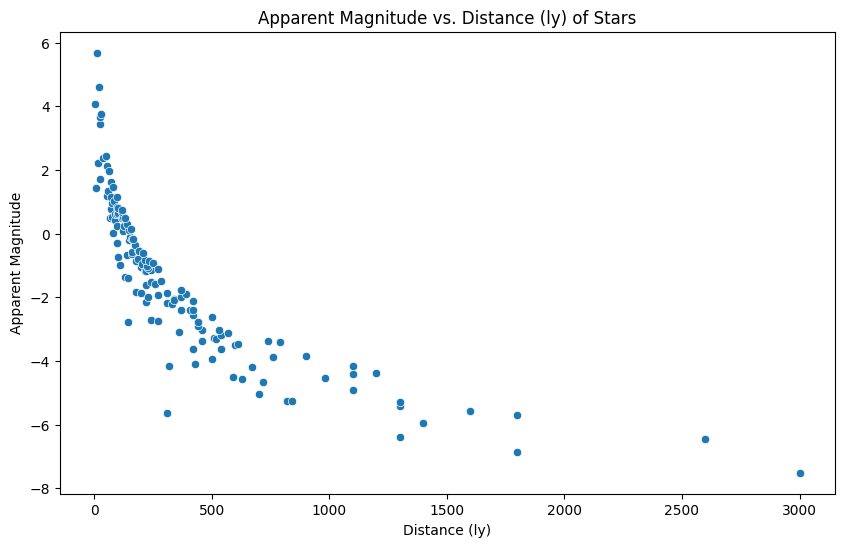

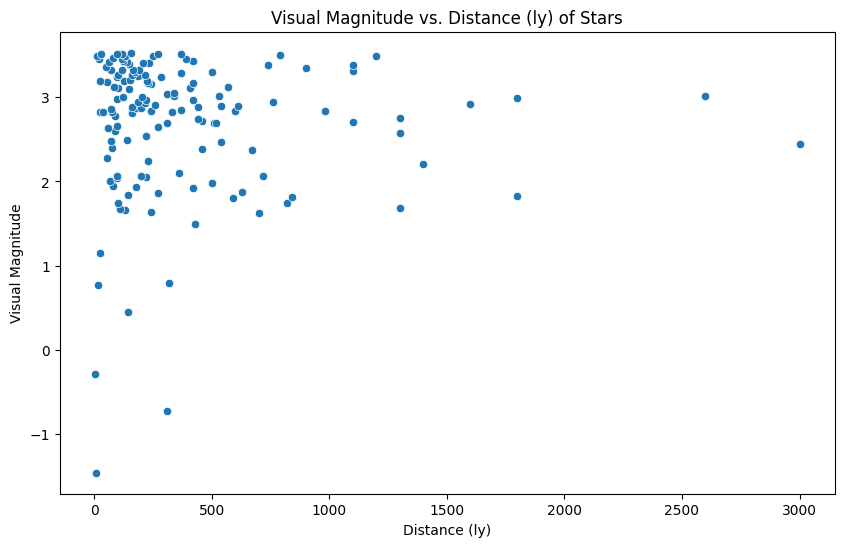

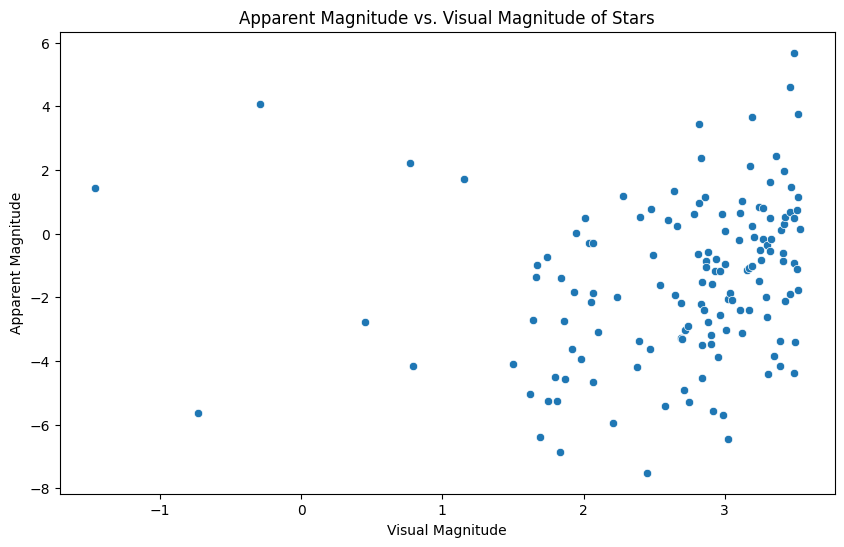

In [ ]:
# Scatter plot for 'Apparent Magnitude' vs. 'Distance (ly)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance (ly)', y='Absolute Magnitude', data=df)
plt.title('Apparent Magnitude vs. Distance (ly) of Stars')
plt.xlabel('Distance (ly)')
plt.ylabel('Apparent Magnitude')
plt.show()

# Scatter plot for 'Visual Magnitude' vs. 'Distance (ly)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance (ly)', y='Visual Magnitude', data=df)
plt.title('Visual Magnitude vs. Distance (ly) of Stars')
plt.xlabel('Distance (ly)')
plt.ylabel('Visual Magnitude')
plt.show()

# Scatter plot for 'Apparent Magnitude' vs. 'Visual Magnitude'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Visual Magnitude', y='Absolute Magnitude', data=df)
plt.title('Apparent Magnitude vs. Visual Magnitude of Stars')
plt.xlabel('Visual Magnitude')
plt.ylabel('Apparent Magnitude')
plt.show()


*Insight: These relationships can reveal patterns, such as whether stars further away are dimmer and how intrinsic brightness compares to observed brightness.*

#6. Correlation Matrix

**we’ll create a correlation matrix to explore the relationships between variables.**

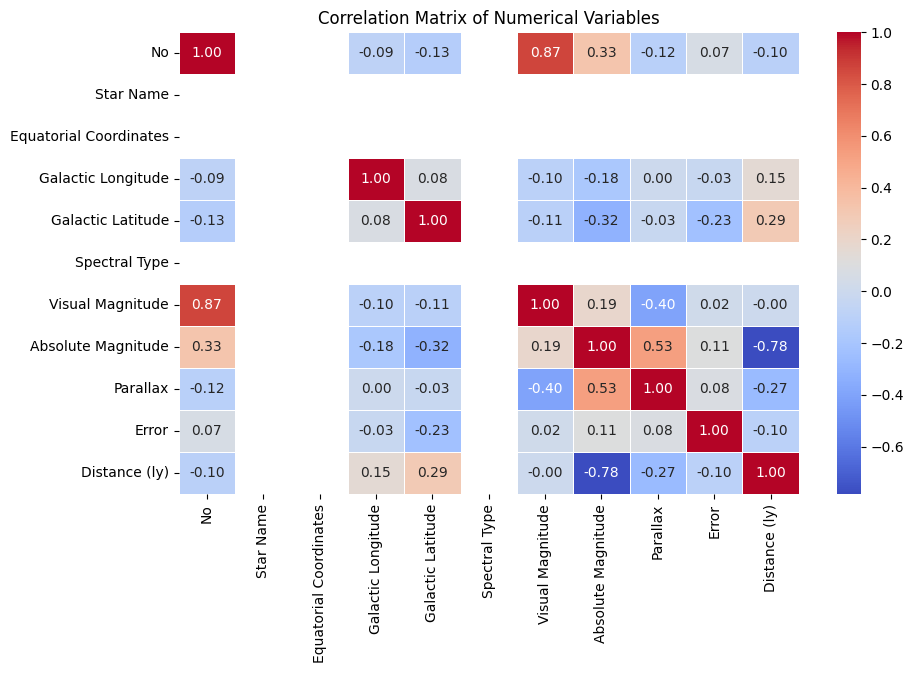

In [ ]:
# Correlation matrix heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


*Insight: The correlation matrix tells us which variables are strongly related. For example, if the Apparent Magnitude and Visual Magnitude are highly correlated, it indicates that intrinsic brightness and observed brightness are strongly linked.*

#7.Boxplots & Outliers

**We’ll use boxplots to check for outliers in key variables like Visual Magnitude and Distance (ly).**

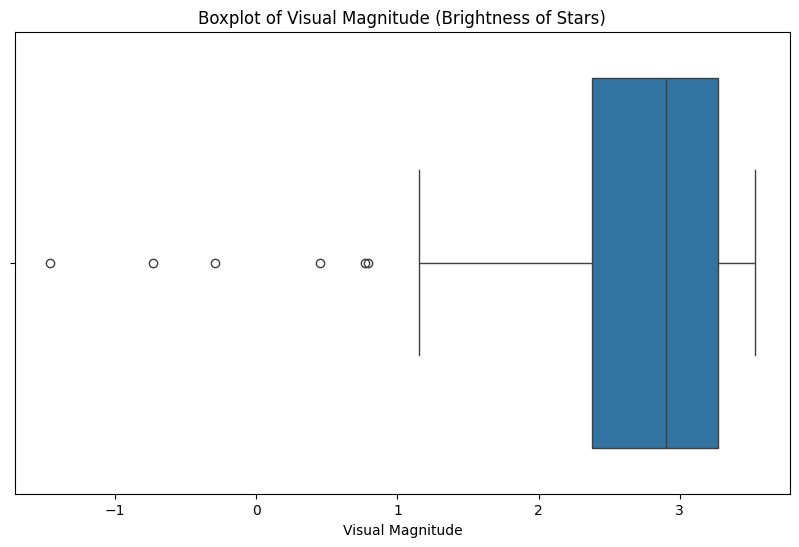

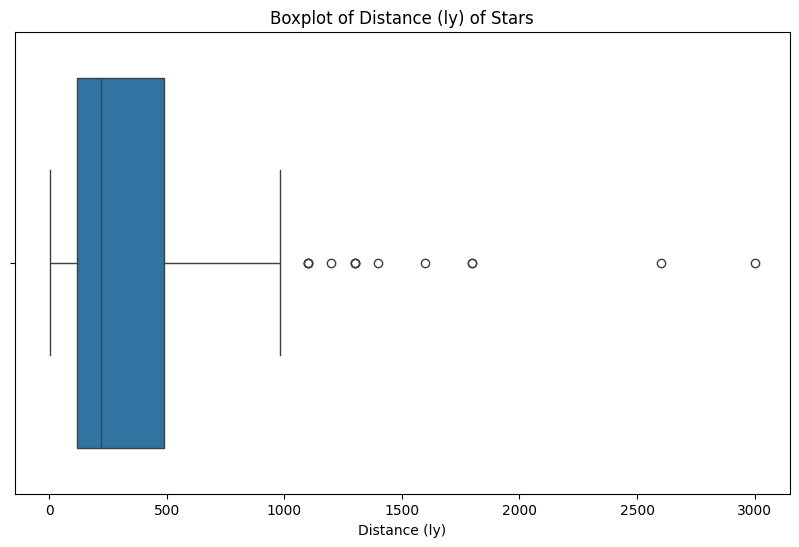

In [ ]:
# Boxplot for 'Visual Magnitude'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Visual Magnitude'])
plt.title('Boxplot of Visual Magnitude (Brightness of Stars)')
plt.show()

# Boxplot for 'Distance (ly)'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Distance (ly)'])
plt.title('Boxplot of Distance (ly) of Stars')
plt.show()


*Insight: Boxplots help us detect extreme values. For instance, extremely bright stars (with negative Visual Magnitude) or unusually distant stars could be outliers worth investigating further.*

#CONTRIBUTIONS

**PriyanshuVerma** : Data loading, cleaning, and descriptive analysis

Tasks:

Load and inspect the dataset
Handle missing values and convert data types
Print .info(), .describe(), and initial .head() to understand structure
Create summary statistics (mean, median, etc.)
Plot basic histograms of all numeric columns


**Rounak Kumar Saw** : Basic visualizations and insights

Tasks:

Create and customize histograms & KDE plots for:
Visual Magnitude
Distance (ly)
Apparent Magnitude
Interpret the distribution:
What values are common?
Any skewness or outliers?
Add nice titles, labels, and colors


**Pranjal Tripathi** : Advanced relationships & outlier analysis

Tasks:

Create scatter plots to analyze:
Apparent Magnitude vs Distance (ly)
Visual Magnitude vs Distance (ly)
Apparent vs Visual Magnitude
Draw and interpret a correlation matrix
Generate boxplots to detect outliers
Write interpretation: Do patterns or surprises emerge?


**Aditya Mishra** : First digit analysis & applying Benford’s Law

Tasks:

Write a function to extract first digits
Count frequencies and normalize proportions
Plot observed digit distribution vs. Benford’s Law for:
Visual Magnitude
Distance (ly)
Add dot markers on the Benford curve
Interpret whether the data follows a natural distribution